In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Ashish\\Clustering-Bin-Packing\\src\\main\\resources\\loads.csv', parse_dates=["collection_date","delivery_date"])

In [3]:
df.head()

,collection_longitude,collection_latitude,collection_date,delivery_longitude,delivery_latitude,delivery_date,size,id
0,-2.214219,57.239806,2016-10-06 11:00:00,-2.080793,57.140803,2016-10-06 13:00:00,1.000000,1006262
1,-2.081943,57.127896,2017-01-15 08:30:00,-2.081300,57.143050,2017-01-15 14:00:00,0.166667,1019653
2,-2.081943,57.127896,2017-01-15 08:30:00,-2.081300,57.143050,2017-01-15 14:00:00,0.166667,1019653
3,-2.081943,57.127896,2017-01-15 08:30:00,-2.081300,57.143050,2017-01-15 14:00:00,0.166667,1019653
4,-2.081943,57.127896,2017-01-15 08:30:00,-2.081300,57.143050,2017-01-15 14:00:00,0.166667,1019653


In [23]:
df = df[df.collection_longitude < -1.5]
df = df[df.collection_longitude > -3.5]
df = df[df.collection_latitude < 60]
df = df[df.collection_latitude > 55]
Xc = np.array(list(zip(df['collection_longitude'], df['collection_latitude'])))

In [24]:
Xc

array([[-2.2142191, 57.2398058],
       [-2.0819435, 57.1278956],
       [-2.0819435, 57.1278956],
       ...,
       [-2.2142191, 57.2398058],
       [-2.2142191, 57.2398058],
       [-2.2142191, 57.2398058]])

In [25]:
Xd = np.array(list(zip(df['delivery_longitude'], df['delivery_latitude'])))
Xd

array([[-2.08079338, 57.14080343],
       [-2.0812996 , 57.1430504 ],
       [-2.0812996 , 57.1430504 ],
       ...,
       [-2.08299279, 57.14157764],
       [-2.08299279, 57.14157764],
       [-2.08299279, 57.14157764]])

In [26]:
from sklearn.cluster import KMeans
def k_means(X, n):
    # Number of clusters
    kmeans = KMeans(n_clusters=n)
    # Fitting the input data
    kmeans = kmeans.fit(X)
    # Getting the cluster labels
    labels = kmeans.predict(X)
    # Centroid values
    C = kmeans.cluster_centers_
    return C, kmeans

In [59]:
Cc, kmc = k_means(Xc, 5)
dc = {i: Xc[np.where(kmc.labels_ == i)] for i in range(kmc.n_clusters)}
print(Cc)
dc

[[-2.08408465 57.13560298]
 [-2.58860425 56.75699201]
 [-1.81486956 57.5098718 ]
 [-2.15131893 57.06770324]
 [-2.23690576 57.19893667]]


{0: array([[-2.0819435, 57.1278956],
        [-2.0819435, 57.1278956],
        [-2.0819435, 57.1278956],
        ...,
        [-2.0813862, 57.1244527],
        [-2.0813862, 57.1244527],
        [-2.0690483, 57.121768 ]]), 1: array([[-2.655163  , 56.806022  ],
        [-2.66967773, 56.72259433],
        [-2.66967773, 56.72259433],
        ...,
        [-2.655163  , 56.806022  ],
        [-2.66967773, 56.72259433],
        [-2.66967773, 56.72259433]]), 2: array([[-1.7933509 , 57.488538  ],
        [-1.8095606 , 57.492408  ],
        [-1.8135355 , 57.4849584 ],
        ...,
        [-1.8857425 , 57.5153244 ],
        [-1.8856144 , 57.50969148],
        [-1.8150047 , 57.4912753 ]]), 3: array([[-2.2478849, 57.049479 ],
        [-2.1534924, 57.0710743],
        [-2.1534924, 57.0710743],
        ...,
        [-2.1621119, 57.0693016],
        [-2.1621119, 57.0693016],
        [-2.1568687, 57.0695778]]), 4: array([[-2.2142191, 57.2398058],
        [-2.417496 , 57.1141564],
        [-2.417496 , 

In [61]:
Cd, kmd = k_means(Xd, 3)
print(Cd)
dd = {i: Xd[np.where(kmd.labels_ == i)] for i in range(kmd.n_clusters)}
dd

[[-2.07702437 57.14056023]
 [-2.08290377 57.14180178]
 [-2.09031679 57.14442936]]


{0: array([[-2.072161  , 57.1427326 ],
        [-2.07722068, 57.14501193],
        [-2.07722068, 57.14501193],
        ...,
        [-2.07722068, 57.14501193],
        [-2.07722068, 57.14501193],
        [-2.0763731 , 57.14520401]]), 1: array([[-2.08079338, 57.14080343],
        [-2.0812996 , 57.1430504 ],
        [-2.0812996 , 57.1430504 ],
        ...,
        [-2.08299279, 57.14157764],
        [-2.08299279, 57.14157764],
        [-2.08299279, 57.14157764]]), 2: array([[-2.093348 , 57.1463256],
        [-2.093348 , 57.1463256],
        [-2.093348 , 57.1463256],
        ...,
        [-2.093348 , 57.1463256],
        [-2.093348 , 57.1463256],
        [-2.093348 , 57.1463256]])}

In [62]:
print(type(Cd))
Cdx = Cd[:, 0]
Cdy = Cd[:, 1]
print(Cd)
print(Cdx)
print(Cdy)
print(type(Cdx))
print(type(Cdy))

<class 'numpy.ndarray'>
[[-2.07702437 57.14056023]
 [-2.08290377 57.14180178]
 [-2.09031679 57.14442936]]
[-2.07702437 -2.08290377 -2.09031679]
[57.14056023 57.14180178 57.14442936]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [63]:
print(type(Cc))
Ccx = Cc[:, 0]
Ccy = Cc[:, 1]
print(Cc)
print(Ccx)
print(Ccy)
print(type(Ccx))
print(type(Ccy))

<class 'numpy.ndarray'>
[[-2.08408465 57.13560298]
 [-2.58860425 56.75699201]
 [-1.81486956 57.5098718 ]
 [-2.15131893 57.06770324]
 [-2.23690576 57.19893667]]
[-2.08408465 -2.58860425 -1.81486956 -2.15131893 -2.23690576]
[57.13560298 56.75699201 57.5098718  57.06770324 57.19893667]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [64]:
import seaborn as sns

In [82]:
kc = dc.keys()
vc = list(dc.values())
print(type(vc[0]))
# for i in values:
#     print(type(i))
cc1 = vc[0]
cc2 = vc[1]
cc3 = vc[2]
cc4 = vc[3]
cc5 = vc[4]

<class 'numpy.ndarray'>


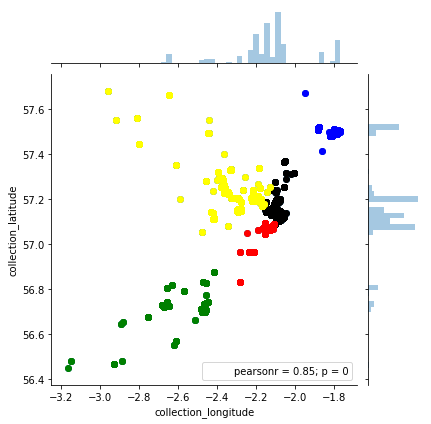

In [83]:
df = df[df.collection_longitude < -1.5]
df = df[df.collection_longitude > -3.5]
df = df[df.collection_latitude < 60]
df = df[df.collection_latitude > 55]
plt1 = sns.jointplot(x='collection_longitude', y='collection_latitude', data=df)
#plt1.ax_joint.scatter(Ccx, Ccy, color = 'red')

plt1.ax_joint.scatter(cc1[:, 0], cc1[:, 1], color = 'black')
plt1.ax_joint.scatter(cc2[:, 0], cc2[:, 1], color = 'green')
plt1.ax_joint.scatter(cc3[:, 0], cc3[:, 1], color = 'blue')
plt1.ax_joint.scatter(cc4[:, 0], cc4[:, 1], color = 'red')
plt1.ax_joint.scatter(cc5[:, 0], cc5[:, 1], color = 'yellow')

#print(len(df))

In [85]:
kd = dd.keys()
vd = list(dd.values())
print(type(values))
# for i in values:
#     print(type(i))
cd1 = vd[0]
cd2 = vd[1]
cd3 = vd[2]

<class 'list'>


81672


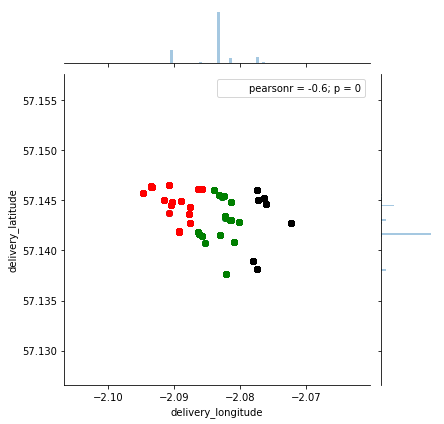

In [87]:
df = df[df.delivery_longitude > -2.2]
df = df[df.delivery_longitude < -2.0]
df = df[df.delivery_latitude > 57.1]
df = df[df.delivery_latitude < 57.2]
print(len(df))
plt2  = sns.jointplot(x='delivery_longitude', y='delivery_latitude', data=df)
plt2.ax_joint.scatter(cd1[:, 0], cd1[:, 1], color = 'black')
plt2.ax_joint.scatter(cd2[:, 0], cd2[:, 1], color = 'green')
plt2.ax_joint.scatter(cd3[:, 0], cd3[:, 1], color = 'red')

In [35]:
print(type(Cc))
Ccx = Cc[:, 0]
Ccy = Cc[:, 1]
print(Cc)
print(Ccx)
print(Ccy)
print(type(Ccx))
print(type(Ccy))

<class 'numpy.ndarray'>
[[-2.23690576 57.19893667]
 [-1.81486956 57.5098718 ]
 [-2.58860425 56.75699201]
 [-2.15131893 57.06770324]
 [-2.08408465 57.13560298]]
[-2.23690576 -1.81486956 -2.58860425 -2.15131893 -2.08408465]
[57.19893667 57.5098718  56.75699201 57.06770324 57.13560298]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [43]:
plt1